In [1]:

import numpy as np 
import pandas as pd 
import pandas as pd

import os
for dirname, _, filenames in os.walk("archive"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


archive\brain_tumor_dataset\no\1 no.jpeg
archive\brain_tumor_dataset\no\10 no.jpg
archive\brain_tumor_dataset\no\11 no.jpg
archive\brain_tumor_dataset\no\12 no.jpg
archive\brain_tumor_dataset\no\13 no.jpg
archive\brain_tumor_dataset\no\14 no.jpg
archive\brain_tumor_dataset\no\15 no.jpg
archive\brain_tumor_dataset\no\17 no.jpg
archive\brain_tumor_dataset\no\18 no.jpg
archive\brain_tumor_dataset\no\19 no.jpg
archive\brain_tumor_dataset\no\2 no.jpeg
archive\brain_tumor_dataset\no\20 no.jpg
archive\brain_tumor_dataset\no\21 no.jpg
archive\brain_tumor_dataset\no\22 no.jpg
archive\brain_tumor_dataset\no\23 no.jpg
archive\brain_tumor_dataset\no\24 no.jpg
archive\brain_tumor_dataset\no\25 no.jpg
archive\brain_tumor_dataset\no\26 no.jpg
archive\brain_tumor_dataset\no\27 no.jpg
archive\brain_tumor_dataset\no\28 no.jpg
archive\brain_tumor_dataset\no\29 no.jpg
archive\brain_tumor_dataset\no\3 no.jpg
archive\brain_tumor_dataset\no\30 no.jpg
archive\brain_tumor_dataset\no\31 no.jpg
archive\brain_tum

In [2]:
!mkdir TRAIN TEST VAL 
!mkdir TRAIN/YES TEST/YES VAL/YES
!mkdir TRAIN/NO TEST/NO VAL/NO 

��Ŀ¼���ļ� TRAIN �Ѿ����ڡ�
����: TRAIN ʱ������
��Ŀ¼���ļ� TEST �Ѿ����ڡ�
����: TEST ʱ������
��Ŀ¼���ļ� VAL �Ѿ����ڡ�
����: VAL ʱ������
�����﷨����ȷ��
�����﷨����ȷ��


In [3]:
import pathlib

data_dir = r"archive/brain_tumor_dataset"
data_dir =pathlib.Path(data_dir)

data_dir

WindowsPath('archive/brain_tumor_dataset')

In [4]:
import glob

imageGroup1 = glob.glob("archive/brain_tumor_dataset/*/*.JPG")


imageGroup2 = glob.glob("archive/brain_tumor_dataset/*/*.jpg")

numImages = imageGroup1 

print("number of images: ", len(numImages))

number of images:  245


In [5]:
df = pd.DataFrame()
df["imagePath"] = numImages

In [6]:
df['Filename'] = df["imagePath"].map( lambda imgPath: imgPath.split("/")[-1])

df['Label'] = df["imagePath"].map(lambda imgPath: imgPath.split("\\")[-2] if "no" in imgPath or "yes" in imgPath else None)


In [7]:
df

,imagePath,Filename,Label
0,archive/brain_tumor_dataset\no\10 no.jpg,brain_tumor_dataset\no\10 no.jpg,no
1,archive/brain_tumor_dataset\no\11 no.jpg,brain_tumor_dataset\no\11 no.jpg,no
2,archive/brain_tumor_dataset\no\12 no.jpg,brain_tumor_dataset\no\12 no.jpg,no
3,archive/brain_tumor_dataset\no\13 no.jpg,brain_tumor_dataset\no\13 no.jpg,no
4,archive/brain_tumor_dataset\no\14 no.jpg,brain_tumor_dataset\no\14 no.jpg,no
...,...,...,...
240,archive/brain_tumor_dataset\yes\Y95.jpg,brain_tumor_dataset\yes\Y95.jpg,yes
241,archive/brain_tumor_dataset\yes\Y96.jpg,brain_tumor_dataset\yes\Y96.jpg,yes
242,archive/brain_tumor_dataset\yes\Y97.JPG,brain_tumor_dataset\yes\Y97.JPG,yes
243,archive/brain_tumor_dataset\yes\Y98.JPG,brain_tumor_dataset\yes\Y98.JPG,yes


<Axes: title={'center': 'Class Distribution'}>

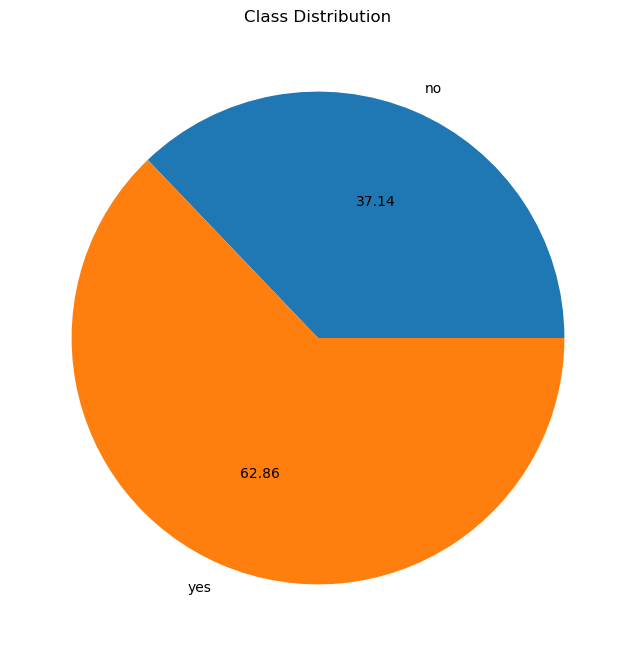

In [8]:
from matplotlib import pyplot as plt

plt.title("Class Distribution")
df.groupby("Label").size().plot(kind='pie', autopct='%.2f', figsize=(10,8))

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df["Label"])

In [10]:
val, test = train_test_split(test, test_size=0.5, random_state=1, stratify=test["Label"])

In [11]:
len(train), len(val), len(test)

(196, 24, 25)

In [12]:
train.loc[0, 'imagePath']

'archive/brain_tumor_dataset\\no\\10 no.jpg'

In [13]:
train.iloc[1]['Label']

'yes'

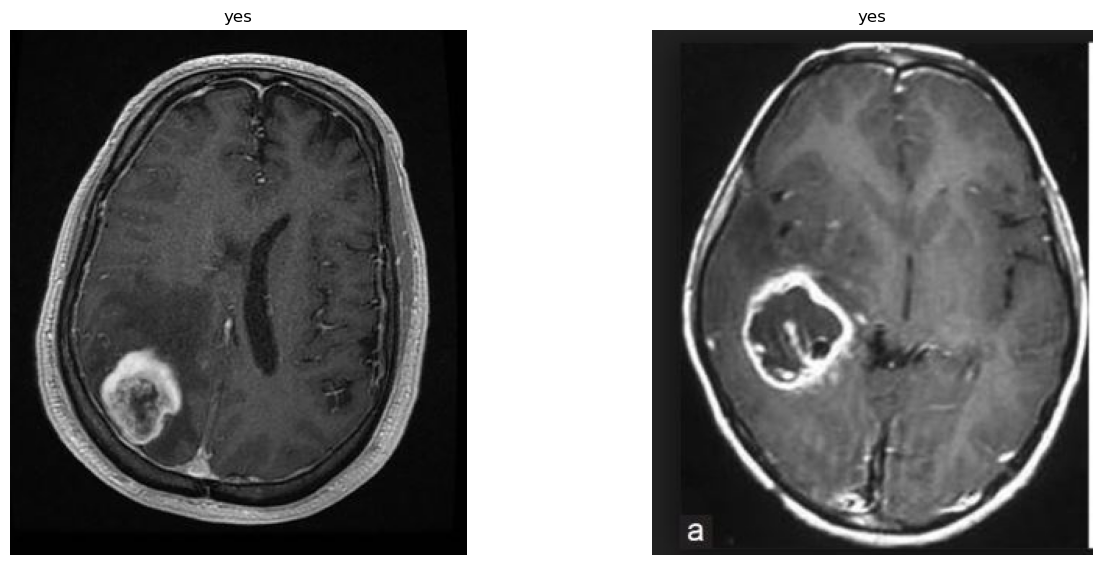

In [83]:
plt.figure(figsize=(15, 15))

for i in range(2):
    imgPath = train.iloc[i]['imagePath']
    plt.subplot(2,2,i+1)
    plt.imshow(plt.imread(imgPath))
    plt.title(train.iloc[i]['Label'])
    plt.axis('off')

In [15]:
import shutil

def copy_image_label_directory(tmpDF, label_dst_dict):
    for index, row in tmpDF.iterrows():
        dst_path = label_dst_dict[row["Label"]]+'/'+row["Filename"]
        
        # Create the destination directory if it doesn't exist
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)
        
        shutil.copyfile(row['imagePath'], dst_path)

In [16]:
label_dst_dict = {
    "yes": "TRAIN/YES",
    "no": "TRAIN/NO"
}

copy_image_label_directory(train, label_dst_dict)

In [17]:
label_dst_dict = {
    "yes": "./VAL/YES",
    "no": "./VAL/NO"
}

copy_image_label_directory(val, label_dst_dict)

In [18]:
label_dst_dict = {
    "yes": "./TEST/YES",
    "no": "./TEST/NO"
}

copy_image_label_directory(test, label_dst_dict)

In [19]:
IMAGE_SIZE = (128, 128,3)
BATCH_SIZE = 32

In [20]:
TRAIN_DIRECTORY = "./TRAIN"
VALIDATION_DIRECTORY = "./VAL"
TEST_DIRECTORY = "./TEST"

In [21]:
from keras.preprocessing.image import ImageDataGenerator

class Generators:
    def __init__(self):
        self.batch_size=BATCH_SIZE
        self.img_size=(IMAGE_SIZE[0], IMAGE_SIZE[1])
        
        _train_datagen = ImageDataGenerator(
            rescale= 1 / 255,
        )
        
        self.train_generator = _train_datagen.flow_from_directory(
            directory=TRAIN_DIRECTORY,
            batch_size=self.batch_size,
            shuffle=True,
            class_mode="binary",
            seed=1,
            target_size=self.img_size)
        print('Train generator created')

        _val_datagen = ImageDataGenerator(
            rescale= 1 / 255, 
        )
        self.val_generator = _val_datagen.flow_from_directory(
            directory=VALIDATION_DIRECTORY,
            batch_size=self.batch_size,
            shuffle=True,
            class_mode="binary",
            seed=1,
            target_size=self.img_size)    
        print('Validation generator created')
        
        _test_datagen=ImageDataGenerator(
            rescale= 1 / 255
        )
        self.test_generator = _test_datagen.flow_from_directory(            
            directory=TEST_DIRECTORY,
            batch_size=self.batch_size,
            shuffle=False,
            class_mode="binary",
            seed=1,
            target_size=self.img_size)    
        print('Test generator created')

In [22]:
generators = Generators()

Found 196 images belonging to 2 classes.
Train generator created
Found 24 images belonging to 2 classes.
Validation generator created
Found 25 images belonging to 2 classes.
Test generator created


In [23]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=list(generators.train_generator.class_indices.values()),
                                                 y=generators.train_generator.classes)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 1.3424657534246576, 1: 0.7967479674796748}

In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report

def print_score(y_pred, y_real):
    print("Accuracy: ", accuracy_score(y_real, y_pred))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    print(confusion_matrix(y_real, y_pred))

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred))

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate, GRU, Reshape
import tensorflow.keras.backend as K
from tensorflow.keras.layers.experimental import preprocessing


In [26]:
def bn_rl_conv(x,filters,kernel=1,strides=1):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
    return x

In [27]:
def dense_block(x, repetition, filters):
    for _ in range(repetition):
        y = bn_rl_conv(x, 4*filters)
        y = bn_rl_conv(y, filters, 3)
        x = concatenate([y,x])
    return x

In [28]:
def transition_layer(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
    x = Dropout(0.1)(x)
    x = AvgPool2D(2, strides = 2, padding = 'same')(x)
    return x

In [29]:
def build_densenet(input_shape, n_classes, filters = 32):
    input = Input (input_shape)
    x = preprocessing.RandomFlip('horizontal')(input)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(x)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)  
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition, filters)
        x = transition_layer(d)    

    x = GlobalAveragePooling2D()(d)
    output = Dense(1, activation = 'sigmoid')(x)   
    model = Model(input, output)
    return model

In [30]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [39]:
from tensorflow.keras.metrics import Recall, Precision
import tensorflow.keras as keras

input_shape = IMAGE_SIZE[0], IMAGE_SIZE[1], IMAGE_SIZE[2]
n_classes = len(generators.train_generator.class_indices)

filters = 32
clf = build_densenet(input_shape, n_classes, filters = 32)
clf.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
            loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score])   

clf.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 random_flip_2 (RandomFlip)     (None, 128, 128, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_242 (Conv2D)            (None, 64, 64, 64)   9472        ['random_flip_2[0][0]']          
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 64)  0           ['conv2d_242[0][0]']       

In [43]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras


model_weights_file_path = "densenet121_best_model_weights.h5"
checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=50)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=0, mode='max', min_delta=0.0001, cooldown=0, min_lr=0.0001)
plotlosses = PlotLossesKeras()

call_backs = [checkpoint, early_stopping, plotlosses, lr_reduce]
#clf.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
            #loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score])   

#clf.summary()

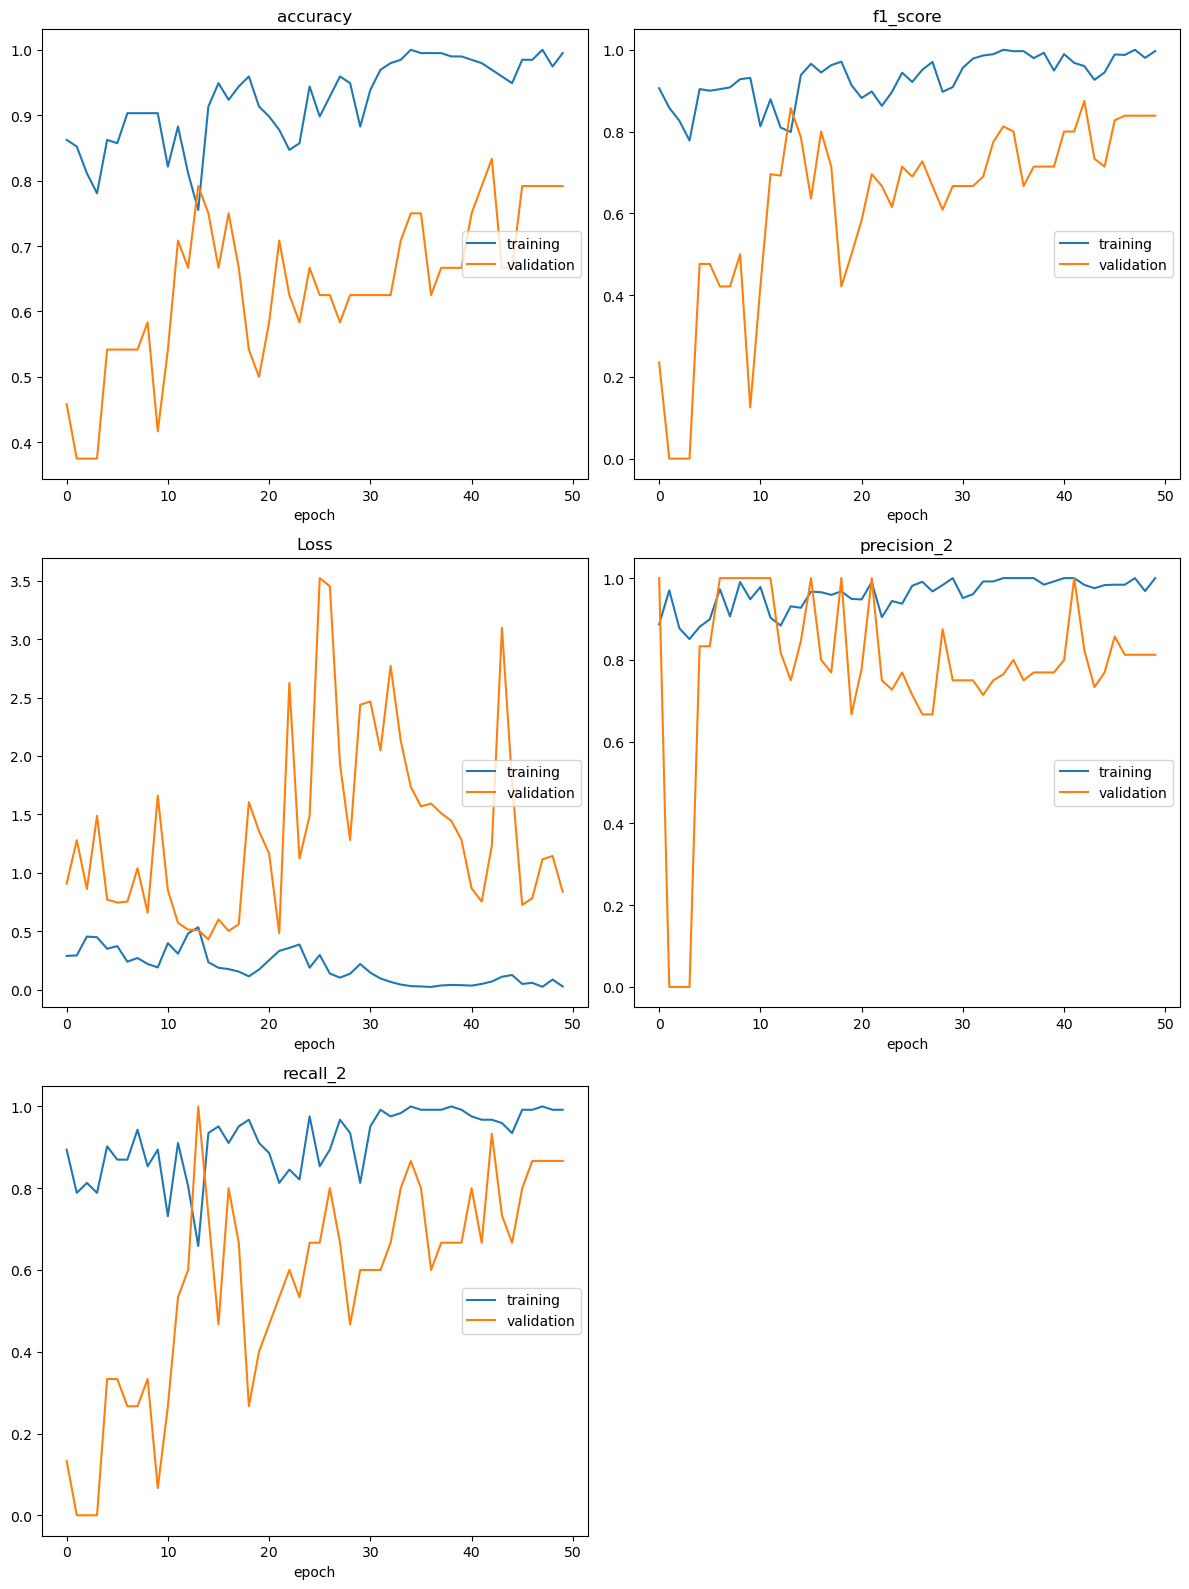

accuracy
	training         	 (min:    0.755, max:    1.000, cur:    0.995)
	validation       	 (min:    0.375, max:    0.833, cur:    0.792)
f1_score
	training         	 (min:    0.778, max:    1.000, cur:    0.997)
	validation       	 (min:    0.000, max:    0.875, cur:    0.839)
Loss
	training         	 (min:    0.023, max:    0.534, cur:    0.027)
	validation       	 (min:    0.431, max:    3.522, cur:    0.838)
precision_2
	training         	 (min:    0.851, max:    1.000, cur:    1.000)
	validation       	 (min:    0.000, max:    1.000, cur:    0.812)
recall_2
	training         	 (min:    0.659, max:    1.000, cur:    0.992)
	validation       	 (min:    0.000, max:    1.000, cur:    0.867)
7/7 [==============================] - 22s 3s/step - loss: 0.0266 - accuracy: 0.9949 - precision_2: 1.0000 - recall_2: 0.9919 - f1_score: 0.9968 - val_loss: 0.8379 - val_accuracy: 0.7917 - val_precision_2: 0.8125 - val_recall_2: 0.8667 - val_f1_score: 0.8387 - lr: 2.5000e-04


In [44]:
EPOCHS = 50
plotlosses = PlotLossesKeras()

history = clf.fit(generators.train_generator, 
                  validation_data=generators.val_generator,
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE,
                  callbacks=call_backs,
                  class_weight=class_weights,
                  verbose=1)

In [70]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(
    include_top=False, 
    input_shape=(128,128,3)
)

In [71]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

clf = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),    
    base_model,
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [72]:
import tensorflow as tf

clf.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall(), f1_score]
) 

In [73]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras

model_weights_file_path = "vgg16_best_model_weights.h5"
checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=50)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=0, mode='max', min_delta=0.0001, cooldown=0, min_lr=0.0001)
plotlosses = PlotLossesKeras()

call_backs = [checkpoint, early_stopping, plotlosses, lr_reduce]

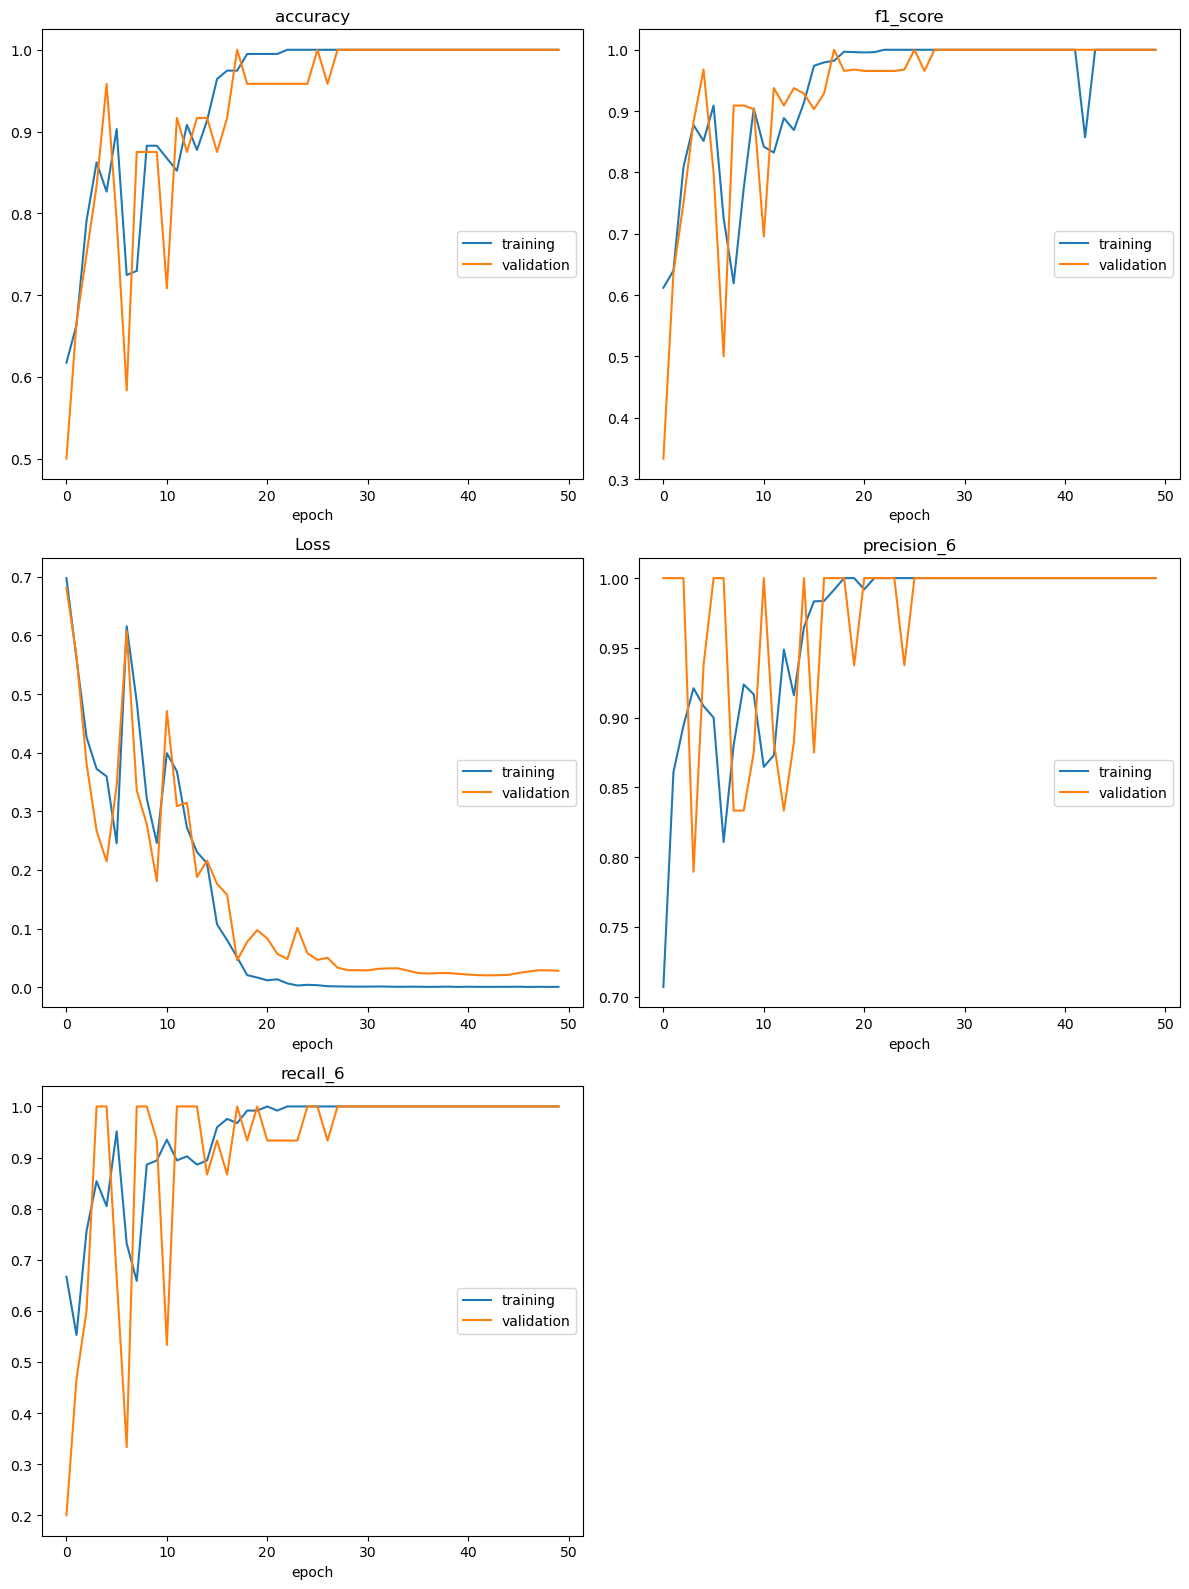

accuracy
	training         	 (min:    0.617, max:    1.000, cur:    1.000)
	validation       	 (min:    0.500, max:    1.000, cur:    1.000)
f1_score
	training         	 (min:    0.612, max:    1.000, cur:    1.000)
	validation       	 (min:    0.333, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.698, cur:    0.001)
	validation       	 (min:    0.020, max:    0.681, cur:    0.028)
precision_6
	training         	 (min:    0.707, max:    1.000, cur:    1.000)
	validation       	 (min:    0.789, max:    1.000, cur:    1.000)
recall_6
	training         	 (min:    0.553, max:    1.000, cur:    1.000)
	validation       	 (min:    0.200, max:    1.000, cur:    1.000)
7/7 [==============================] - 24s 3s/step - loss: 5.4960e-04 - accuracy: 1.0000 - precision_6: 1.0000 - recall_6: 1.0000 - f1_score: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000 - val_precision_6: 1.0000 - val_recall_6: 1.0000 - val_f1_score: 1.0000 - lr: 1.0000e-04


In [74]:
EPOCHS = 50
history = clf.fit(generators.train_generator, 
                  validation_data=generators.val_generator,
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE,
                  callbacks=call_backs,
                  class_weight=class_weights,
                  verbose=1)

In [75]:
#clf.load_weights("./densenet121_best_model_weights.h5")
clf.load_weights("./vgg16_best_model_weights.h5")

In [76]:
clf.evaluate(generators.val_generator)

1/1 [==============================] - 1s 523ms/step - loss: 0.0460 - accuracy: 1.0000 - precision_6: 1.0000 - recall_6: 1.0000 - f1_score: 1.0000


[0.045959968119859695, 1.0, 1.0, 1.0, 1.0]

In [77]:
y_hat = clf.predict(generators.test_generator)

1/1 [==============================] - 1s 722ms/step


In [78]:
y_hat = (y_hat > 0.5)+0

In [79]:
print_score(y_hat, generators.test_generator.classes.reshape((-1,1)))

Accuracy:  0.88

Macro precision_recall_fscore_support (macro) average
(0.9210526315789473, 0.8333333333333333, 0.8571428571428572, None)

Macro precision_recall_fscore_support (micro) average
(0.88, 0.88, 0.88, None)

Macro precision_recall_fscore_support (weighted) average
(0.8989473684210526, 0.88, 0.8731428571428572, None)

Confusion Matrix
[[ 6  3]
 [ 0 16]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.84      1.00      0.91        16

    accuracy                           0.88        25
   macro avg       0.92      0.83      0.86        25
weighted avg       0.90      0.88      0.87        25



In [80]:
key_list = list(generators.train_generator.class_indices.keys())
val_list = list(generators.train_generator.class_indices.keys())

In [81]:
key_list

['NO', 'YES']

1/1 [==============================] - 0s 160ms/step


(-0.5, 127.5, 127.5, -0.5)

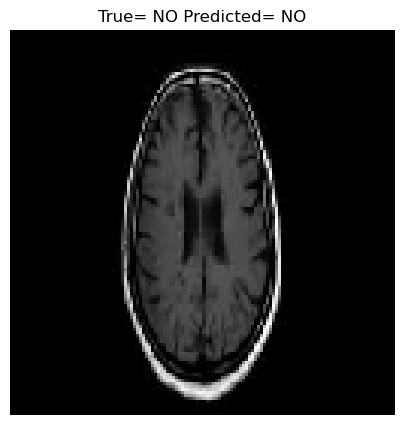

In [82]:
gen_next = generators.test_generator.next()
smaple = gen_next[0]
y_hat = clf.predict(np.array([smaple[0]]))
y_hat = (y_hat > 0.5)+0
y_hat = y_hat[-1][-1]

plt.figure(figsize = (5,5))
plt.imshow(smaple[0]);
plt.title("True= {} Predicted= {}".format(
    key_list[int(gen_next[1][0])],
    key_list[y_hat]
    ))
plt.axis('off')